# Microéconomie 5
## TD1 : Répartition optimale des ressources

### Exercice 2 : Préférences quasi-linéaires

Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln (x_1^A) + x_2^A \\
    U^B(x^B) &= 2 \ln (x_1^B) + x_2^B.
\end{aligned}


*Commençons encore par coder les données du problème. À titre d'ilustration, prenons par exemple les dotations $\omega_1 = 6$ et $\omega_2 = 4$.*

In [1]:
ω1 <- 6                                     # dotation totale en bien 1
ω2 <- 4                                     # dotation totale en bien 2
UA <- function(x1, x2) log(x1) + x2         # fonction d'utilité de A
UB <- function(x1, x2) 2*log(x1) + x2       # fonction d'utilité de B
x1 <- seq(0, ω1, length=1000)               # série de valeurs de x1 pour tracer les courbes

#### Question 1. 
Prenons l'exemple de $A$. La fonction d'utilité de $A$ est la somme d'une fonction quelconque de $x_1^A$, à savoir $x_1^A \mapsto \ln(x_1^A)$, et d'une fonction *linéaire* de $x_2^A$ (ici juste $x_2^A \mapsto x_2^A$). Il s'agit donc bien d'une fonction d'utilité quasi-linéaire.

Idem pour $B$.

#### Question 2.
On cherche les optima de Pareto _internes_ : pour cela, on résout le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k > 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Ignorons _a priori_ les contraintes de positivité des allocations. Le lagrangien associé à ce problème est alors

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = \ln(x_1^A) + x_2^A + \lambda (2\ln(x_1^B) + x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\frac{1}{x_1^A} - \mu_1 = 0 \\
    &1 - \mu_2 = 0 \\
    &\lambda \frac{2}{x_1^B} - \mu_1 = 0 \\
    &\lambda - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{\frac{1}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{\mu_1}{\mu_2} = \underbrace{\frac{2}{x_1^B}}_{= \mathsf{TMS}^B} = \frac{2}{\omega_1 - x_1^A}.
\end{equation}

Les optima intérieurs correspondent donc a une unique valeur de $x_1^A$, donnée par

\begin{equation}
    \boxed{ x_1^A = \frac{\omega_1}{3} }
\end{equation}

et doivent aussi vérifier $x_2^A + x_2^B = \omega_2$.


#### Question 3.
Dans la boîte d'Edgeworth il s'agit donc d'un segment vertical. Traçons-le ci-dessous (en violet) avec quelques courbes d'indifférence.

Pour tracer ces courbes d'indifférence, j'utilise
\begin{aligned}
    U^A(x^A) = U_0 &\iff x_2^A = U_0 - \ln(x_1^A) \\
    U^B(x^B) = U_0 &\iff x_2^B = U_0 - 2 \ln(x_1^B).
\end{aligned}


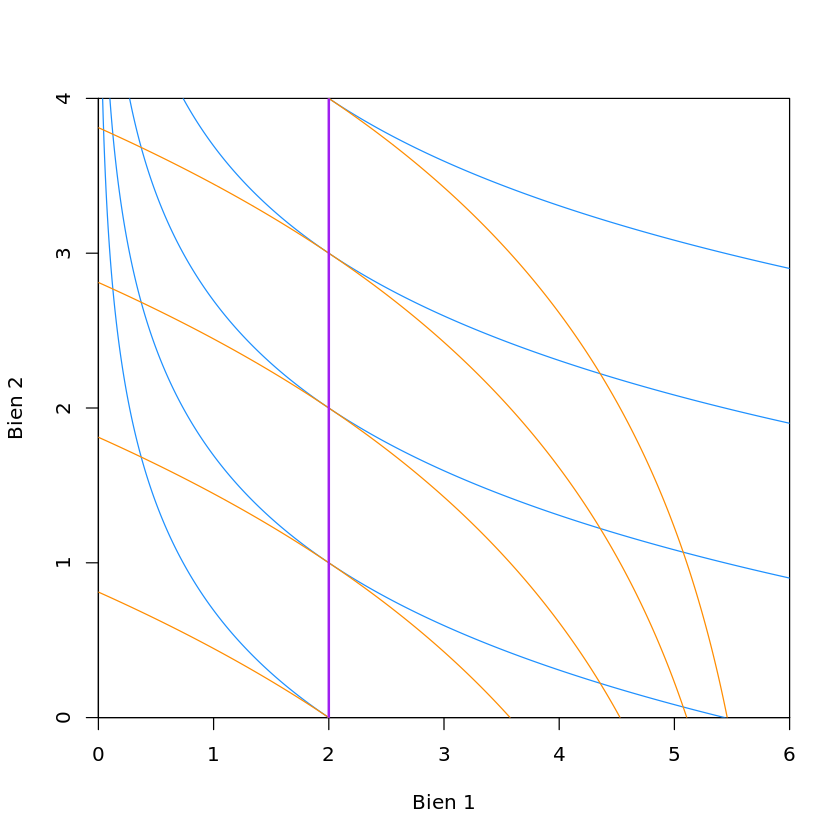

In [4]:
indiffA <- function(U) U - log(x1)
indiffB <- function(U) U - 2*log(x1)

allocA2 <- seq(0, 1, len=5)*ω2                            # allocations en bien 2 de A pour les courbes d'indifférence

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA2)) {                            # courbes d'indifférence tangentes
    xA1 <- ω1/3
    xA2 <- allocA2[i]
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, ω2))
    lines(x1, rev(ω2 - indiffB(UB(ω1 - xA1, ω2 - xA2))), col = "darkorange", ylim = c(0, ω2))
}
lines(c(ω1/3, ω1/3), c(0, ω2), lwd = 2, col = "purple")   # optima intérieurs

#### Question 4.
Voyons maintenant s'il y a des optimas en coin.

Si $x_1^A < \frac{\omega_1}{3}$ et $x_2^A = 0$, alors

\begin{equation}
    \mathsf{TMS}^A = \frac{1}{x_1^A} > \frac{2}{\omega_1 - x_1^A} = \frac{2}{x_1^B} = \mathsf{TMS}^B
\end{equation}

et donc il serait mutuellement profitable que $A$ échange un peu de son bien 2 contre du bien 1 de $B$. Mais comme $x_2^A = 0$, cet échange est impossible.

Il n'y a donc pas d'échange mutuellement profitable, et donc une telle allocation est un optimum de Pareto.


#### Question 5.
De même, si $x_1^A > \frac{\omega_1}{3}$ et $x_2^A = \omega_2$, alors

\begin{equation}
    \mathsf{TMS}^A = \frac{1}{x_1^A} < \frac{2}{\omega_1 - x_1^A} = \frac{2}{x_1^B} = \mathsf{TMS}^B
\end{equation}

et cette fois l'échange inverse serait mutuellement profitable : $B$ devrait échanger un peu de son bien 2 contre du bien 1 de $A$. Mais comme $x_2^B = 0$, cet échange est lui aussi impossible. Une telle allocation est donc aussi un optimum de Pareto.

#### Question 6.
Représentons maintenant l'ensemble des optima de Pareto : internes (question 4) et en coin (questions 5 et 6).

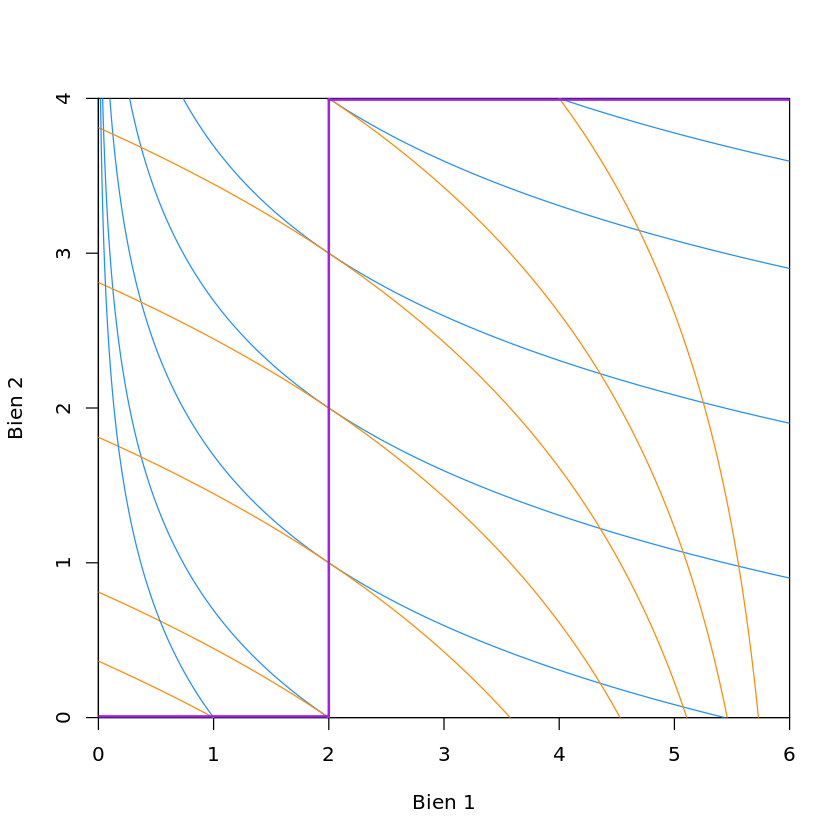

In [5]:
plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")

# Optima intérieurs

for (i in 1:length(allocA2)) {                   # courbes d'indifférence tangentes
    xA1 <- ω1/3
    xA2 <- allocA2[i]
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, ω2))
    lines(x1, rev(ω2 - indiffB(UB(ω1 - xA1, ω2 - xA2))), col = "darkorange", ylim = c(0, ω2))
}
lines(c(ω1/3, ω1/3), c(0, ω2), lwd = 2, col = "purple")   # optima intérieurs

# Optimas en coin : x2A = 0

xA1 <- .5*ω1/3
xA2 <- 0
lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, ω2))
lines(x1, rev(ω2 - indiffB(UB(ω1 - xA1, ω2 - xA2))), col = "darkorange", ylim = c(0, ω2))
lines(c(0, ω1/3), c(0, 0)+.002*ω2, lwd = 2, col = "purple")

# Optimas en coin : x2A = ω2

xA1 <- 2*ω1/3
xA2 <- ω2
lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, ω2))
lines(x1, rev(ω2 - indiffB(UB(ω1 - xA1, ω2 - xA2))), col = "darkorange", ylim = c(0, ω2))
lines(c(ω1/3, ω1), c(ω2, ω2)-.002*ω2, lwd = 2, col = "purple")

On remarque que les courbes d'indifférence sont toutes convexes : **les préférences sont donc convexes**.

On cherche ensuite les optima de Pareto _internes_ : pour cela, il faut par exemple résoudre le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k > 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Ignorons _a priori_ les contraintes de positivité des allocations. Le lagrangien associé à ce problème est alors

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = \ln(x_1^A) + x_2^A + \lambda (2\ln(x_1^B) + x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\frac{1}{x_1^A} - \mu_1 = 0 \\
    &1 - \mu_2 = 0 \\
    &\lambda \frac{2}{x_1^B} - \mu_1 = 0 \\
    &\lambda - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{\frac{1}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{\mu_1}{\mu_2} = \underbrace{\frac{2}{x_1^B}}_{= \mathsf{TMS}^B} = \frac{2}{\omega_1 - x_1^A}.
\end{equation}

Les optima intérieurs correspondent donc a une unique valeur de $x_1^A$, donnée par

\begin{equation}
    \boxed{ x_1^A = \frac{\omega_1}{3} }
    \overset{\text{A.N.}}{=} 2
\end{equation}

et doivent aussi vérifier $x_2^A + x_2^B = \omega_2$.

Dans la boîte d'Edgeworth il s'agit donc d'un segment vertical. Je le trace ci-dessous (en violet) avec quelques courbes d'indifférence.

In [ ]:
allocA2 <- seq(0, 1, len=6)*omega2               # allocations en bien 2 de A pour les courbes d'indifférence

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA2)) {                   # courbes d'indifférence tangentes
    xA1 <- omega1/3
    xA2 <- allocA2[i]
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
    lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
}
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")   # optima intérieurs

Voyons maintenant s'il y a des optimas en coin.

Si $x_1^A < \frac{\omega_1}{3}$ et $x_2^A = 0$, alors

\begin{equation}
    \mathsf{TMS}^A = \frac{1}{x_1^A} > \frac{2}{\omega_1 - x_1^A} = \frac{2}{x_1^B} = \mathsf{TMS}^B
\end{equation}

et donc il serait mutuellement profitable que $A$ échange un peu de son bien 2 contre du bien 1 de $B$. Mais comme $x_2^A = 0$, cet échange est impossible.

Il n'y a donc pas d'échange mutuellement profitable, et donc une telle allocation est un optimum de Pareto.

De même, si $x_1^A > \frac{\omega_1}{3}$ et $x_2^B = 0$, alors

\begin{equation}
    \mathsf{TMS}^A = \frac{1}{x_1^A} < \frac{2}{\omega_1 - x_1^A} = \frac{2}{x_1^B} = \mathsf{TMS}^B
\end{equation}

et cette fois l'échange inverse serait mutuellement profitable : $B$ devrait échanger un peu de son bien 2 contre du bien 1 de $A$. Mais comme $x_2^B = 0$, cet échange est lui aussi impossible. Une telle allocation est donc un optimum de Pareto aussi.

Je représente maintenant l'ensemble des optima de Pareto en violet.

In [ ]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")

# Optima intérieurs

for (i in 1:length(allocA2)) {                   # courbes d'indifférence tangentes
    xA1 <- omega1/3
    xA2 <- allocA2[i]
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
    lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
}
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")   # optima intérieurs

# Optimas en coin : x2A = 0

xA1 <- .5*omega1/3
xA2 <- 0
lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
lines(c(0, omega1/3), c(0, 0)+.002*omega2, lwd = 2, col = "purple")

# Optimas en coin : x2B = 0

xA1 <- 2*omega1/3
xA2 <- omega2
lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
lines(c(omega1/3, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")

On peut aussi de nouveau obtenir le coeur de l'économie à partir d'une allocation donnée $I$ en traçant les courbes d'indifférence passant par $I$.

In [ ]:
I <- c(omega1/2, omega2/2)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")          # optima intérieurs
lines(c(0, omega1/3), c(0, 0)+.002*omega2, lwd = 2, col = "purple")          # optima en coin : x2A = 0
lines(c(omega1/3, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple") # optima en coin : x2B = 0


lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))  # courbe d'indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # CI B

Le coeur de l'économie correspond à la partie de la courbe des optima (partie violette) se situant dans la lentille entre les courbe d'indifférence de $A$ et $B$.